# Problem statement: titanic data set
# approch: NN that predict the servial


In [ ]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_data.csv to Titanic_data.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Titanic_data.csv']))

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head().T


,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
categorical_variables = ['Embarked','Name', 'Sex']

numerical_variable = list(set(df.columns)-set(categorical_variables))

In [ ]:
categorical_variables

['Embarked', 'Name', 'Sex']

In [ ]:
categorical_variables.remove('Name')

In [ ]:
numerical_variable

['PassengerId',
 'Survived',
 'Parch',
 'Cabin',
 'Fare',
 'Age',
 'Ticket',
 'SibSp',
 'Pclass']

In [ ]:
numerical_variable.remove('SibSp')
numerical_variable.remove('Parch')
numerical_variable.remove('Cabin') # its removed so showing error

In [ ]:
numerical_variable.remove('PassengerId')

In [ ]:
numerical_variable.remove('Ticket')

In [ ]:
numerical_variable.remove('Fare')

In [ ]:
numerical_variable

['Survived', 'Age', 'Pclass']

In [ ]:
# for all categorical variable of first univariate analysis is to get the count of the perticuler variable
# i'll write a loop for all categorical variable
for feat in categorical_variables:
  print(feat)
  print(df[feat].value_counts())
  print("-"*50)   # 50 - - -
  print(df[feat].value_counts(normalize=True)*100)
  print("*"*50)   # 50 * * *

Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
--------------------------------------------------
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64
**************************************************
Sex
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64
**************************************************


Embarked
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64
**************************************************
Axes(0.125,0.11;0.775x0.77)


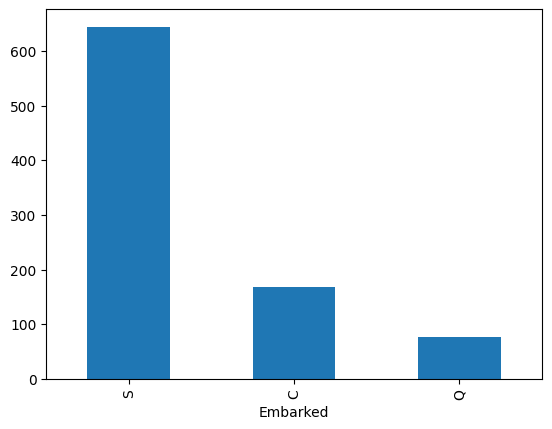

**************************************************
Sex
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64
**************************************************
Axes(0.125,0.11;0.775x0.77)


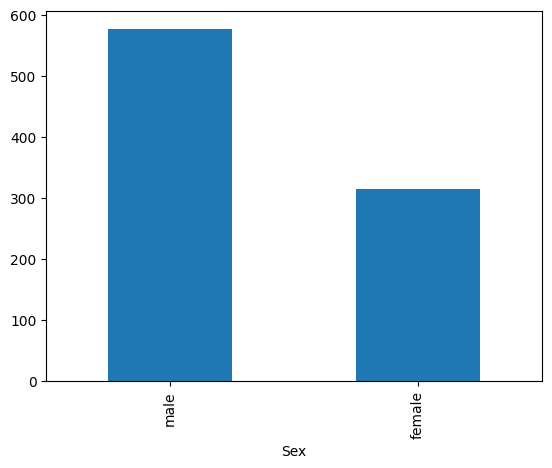

**************************************************


In [ ]:
# for all categorical variable of first univariate analysis is to get the count of the perticuler variable
# i'll write a loop for all categorical variable
for feat in categorical_variables:
  print(feat)
  #print(df[feat].value_counts())
  #print("-"*50)   # 50 - - -
  print(df[feat].value_counts(normalize=True)*100)
  print("*"*50)   # 50 * * *
  print(df[feat].value_counts().plot.bar())
  plt.show()
  print("*"*50)   # 50 * * *

Survived


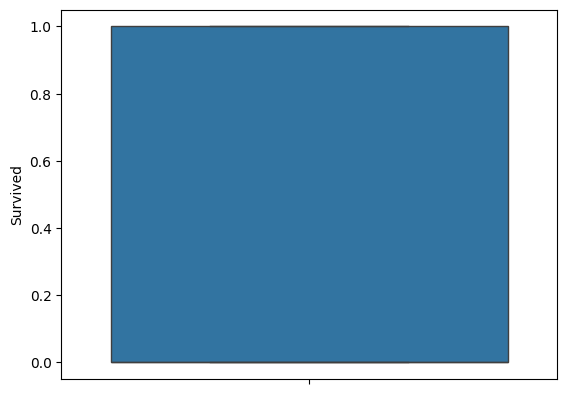

**************************************************
Age


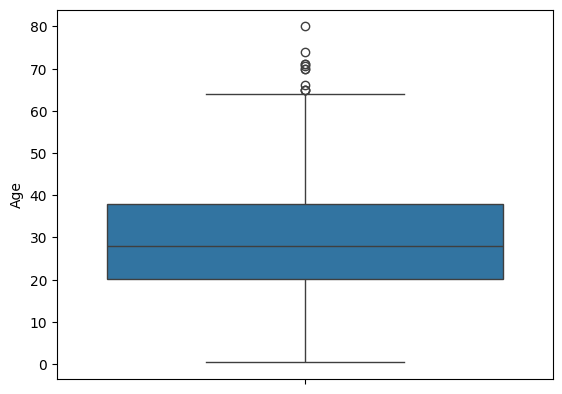

**************************************************
Pclass


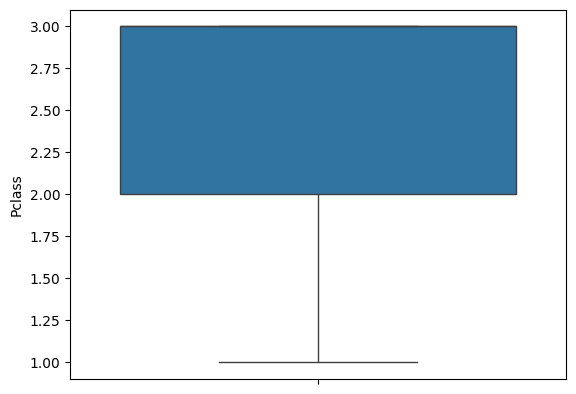

**************************************************


In [ ]:
# for numerical feature

for feat in numerical_variable:
 # figure=plt.figure(figsize=(10,10))
  print(feat)
  sns.boxplot(df[feat],orient='h')
  plt.show()
  print("*"*50)

Survived


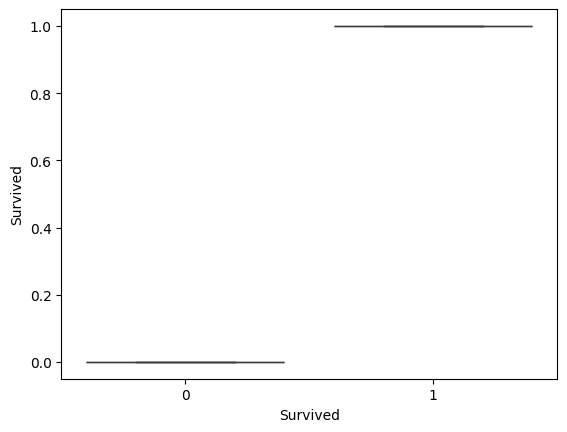

**************************************************
Age


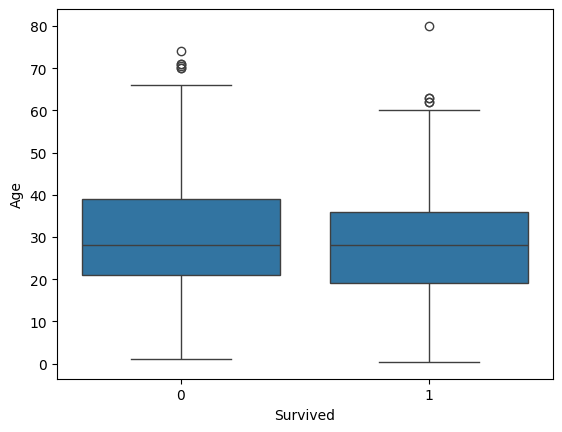

**************************************************
Pclass


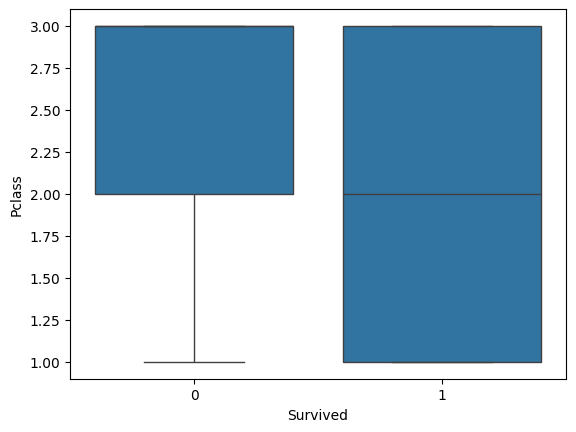

**************************************************


In [ ]:
for feat in numerical_variable:
  print(feat)

  sns.boxplot(x='Survived', y=feat, data= df)
  plt.show()

  print("*"*50)

In [ ]:
numerical_variable

['Survived', 'Age', 'Pclass']

<Axes: >

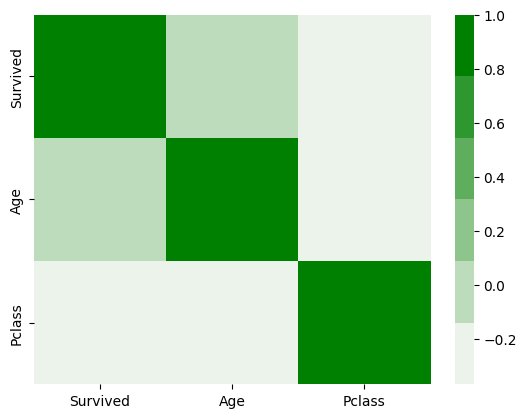

In [ ]:
# Multivariate Analysis

smap=sns.light_palette("green")

sns.heatmap(df[numerical_variable].corr(),cmap=smap)

In [ ]:
#variable=numerical_variable+['Survived']

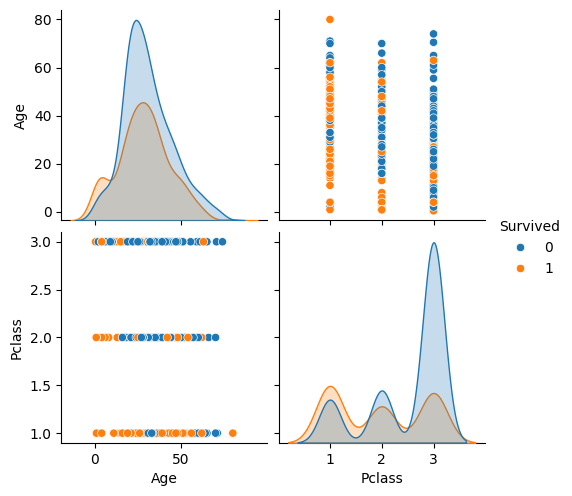

In [ ]:
sns.pairplot(df[numerical_variable],hue='Survived')

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked'] =df['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [ ]:
titanic=df.loc[:,numerical_variable+categorical_variables]

In [ ]:
titanic.head()

,Survived,Age,Pclass,Embarked,Sex
0,0,22.0,3,0.0,0
1,1,38.0,1,1.0,1
2,1,26.0,3,0.0,1
3,1,35.0,1,0.0,1
4,0,35.0,3,0.0,0


In [ ]:
X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=35)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 4) (179, 4) (712,) (179,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [ ]:
Y_test

,Survived
500,0
417,1
432,1
881,0
49,0
...,...
96,0
722,0
582,0
861,0


In [ ]:
# model evolution

from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       106
           1       0.68      0.82      0.75        73

    accuracy                           0.77       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.77      0.77       179



In [ ]:
!pip install tensorflow

In [ ]:
! pip install keras

In [ ]:
import tensorflow

In [ ]:
import keras

In [ ]:

from tensorflow.keras.models import Sequential
classifier = Sequential()
type(classifier)


keras.src.models.sequential.Sequential

In [ ]:
X_train

,Age,Pclass,Embarked,Sex
465,38.0,3,0.0,0
202,34.0,3,0.0,0
317,54.0,2,0.0,0
599,49.0,1,1.0,0
438,64.0,1,0.0,0
...,...,...,...,...
249,54.0,2,0.0,0
448,5.0,3,1.0,1
33,66.0,2,0.0,0
271,25.0,3,0.0,0


In [ ]:
X.shape

(891, 4)

In [ ]:
from keras.layers import Dense

# Change input_dim to 4 to match X_train
classifier.add(Dense(8, input_dim=4))

classifier.add(Dense(3,activation='relu'))

classifier.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
classifier.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,Y_train,epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5771 - loss: nan
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: nan
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6279 - loss: nan
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6369 - loss: nan
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6272 - loss: nan
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5959 - loss: nan
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6478 - loss: nan
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6350 - loss: nan
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: nan
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6387 - loss: nan


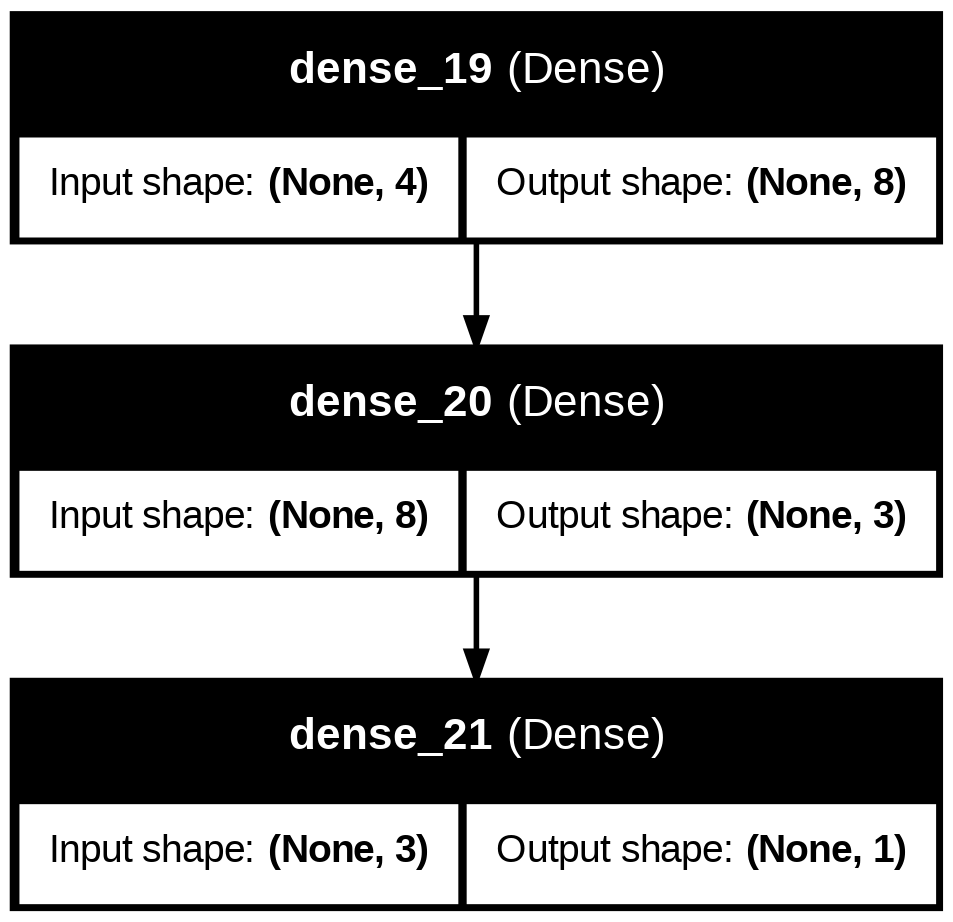

In [ ]:
keras.utils.plot_model(classifier,"M_F_G.png",show_shapes=True,show_layer_names=True)

In [ ]:
import keras
from keras import layers
from keras import ops

model = keras.Sequential(
    [
        layers.Dense(5, activation="relu", name="layer1",input_dim=4),
        layers.Dense(1, activation="sigmoid", name="layer2")
    ]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

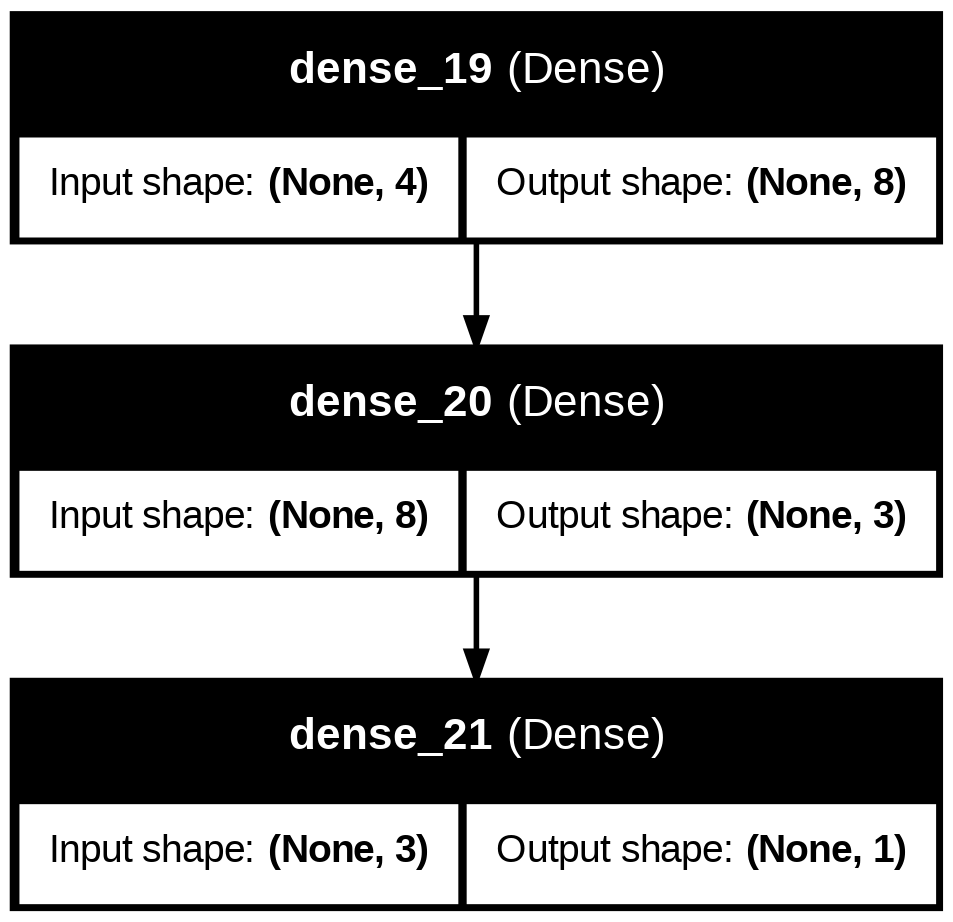

In [ ]:
keras.utils.plot_model(classifier,"M_F_G.png",show_shapes=True,show_layer_names=True)

In [ ]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5699 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6113 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6248 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6170 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6371 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6243 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6159 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6155 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
from keras.layers import Input

In [ ]:
input=keras.Input(shape=(4,))
input.shape

(None, 4)

In [ ]:
dense=layers.Dense(5,activation='relu')
x=dense(input)

In [ ]:
output = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = keras.Model(inputs=input, outputs=output, name='titanic_model')

In [ ]:
model.compile()

In [ ]:
model.summary()

Model: "titanic_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6165 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6305 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6291 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6144 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6339 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5919 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6427 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6489 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# create the ANN network to solve the problem and achive better accuracy then decision tree used there

# scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Create an instance of StandardScaler
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# build the ANN model
model=Sequential()
model.add(Dense(64, activation='relu', input_dim=4)) # Change input_dim to 4
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_test, Y_test))  # Assign the result to 'history'  # Assign the result to 'history'


# evaluate the model

_, accuracy = model.evaluate(X_test,Y_test)
print('Accuracy:{}'.format(accuracy*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6163 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6133 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6504 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6119 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6268 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6156 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6258 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6158 - loss: nan - val_accuracy: 0.5922 - val_loss: nan
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


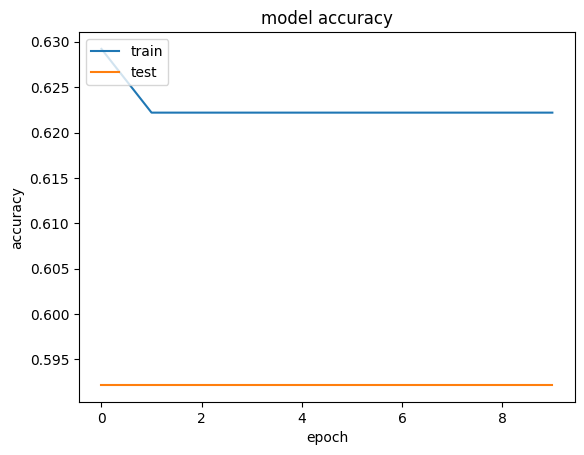

In [ ]:
# list all data in history

print(history.history.keys())  # Now 'history' is defined
# summerize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

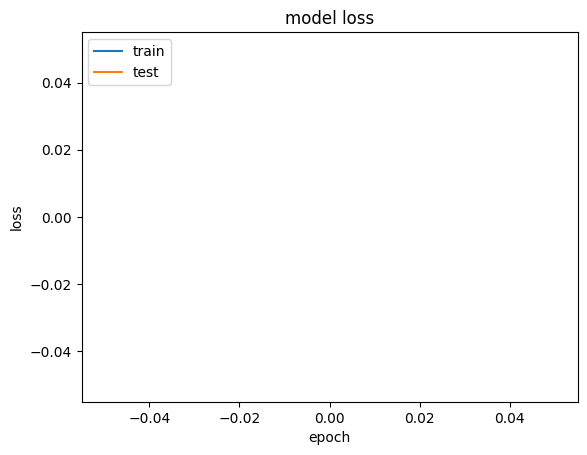

In [ ]:
# summerize histroy for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()